# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

In [ ]:
import torch

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [88]:
import csv
import os
import torch
import numpy as np
from copy import deepcopy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

wines_csv = open('winequality.csv', mode='r')
wines = csv.reader(wines_csv)
wines_list0 = list(wines)

**2.b)** Encode the feature "type".

In [ ]:
wines_list = deepcopy(wines_list0)
i = 0

for item in wines_list:
  wines_list[i] = item[0].split(';')
  j = 0
  for subitem in wines_list[i]:
    try:
      wines_list[i][j] = float(subitem)
    except:
      if subitem == 'red':
        wines_list[i][j] = 0
      elif subitem == 'white':
        wines_list[i][j] = 1
      pass
    j+=1
  i += 1

wines_list_np = wines_list
features = wines_list_np.pop(0)

features_dict = {}
for i, feat in enumerate(features): features_dict[feat] = i 
print(features_dict)

wines_list_np = np.array(wines_list_np)



**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

R^2: 0.00038047247739547707


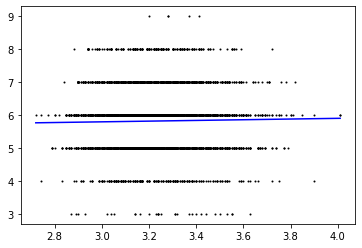

In [98]:
X = wines_list_np[:,features_dict['pH']].reshape((-1, 1))
Y = wines_list_np[:,features_dict['quality']]
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
print(f"R^2: {r_sq}")

plt.clf()
plt.scatter(X, Y, color="black",s=1)
xmin = np.amin(X)
xmax = np.amax(X)
xfit = np.array([xmin, xmax])
yfit = model.predict(xfit.reshape((-1,1)))

plt.plot(xfit, yfit, color = 'blue')
plt.show()

    i) Are the predictor and response statistically related?

In [99]:
print('Not at all')

Not at all


    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

In [100]:
print('It is bad because: \n')
print(f"R^2: {r_sq}")

It is bad because: 

R^2: 0.00038047247739547707


    iii) Is the relationship between the predictor and response positive or negative?

In [111]:
print('model coefficient is ', model.coef_)
print('which is negative so the relationship is negative')

model coefficient is  [0.1059379]
which is negative so the relationship is negative


    iv) What is the predicted value of quality when the pH is 9?

In [107]:
print(model.predict(np.array([3]).reshape((-1,1))))
a1 = model.coef_
a2 = model.intercept_

def inv_lin(a,b,val):
  return (val-b)/a

print(inv_lin(a1,a2,9))

[5.79523019]
[33.25140009]


**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

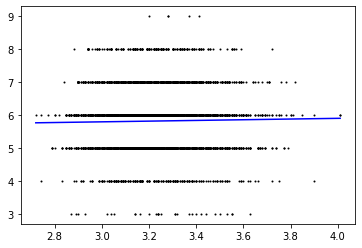

In [108]:
plt.clf()
plt.scatter(X, Y, color="black",s=1)
plt.plot(xfit, yfit, color = 'blue')
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7".

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.